# Movie Recommedation system


## Business Understanding

### a) Introduction

A movie recommendation aims to anticipate or filter preferences in line with the user's  movie selections.it predicts the ratings for movies users haven’t watched yet. Movies are then indexed and suggested to users based on these predicted ratings.The Stakeholders is Netflix Company which is a a streaming service that provides thousands of internet-connected devices with access to a large selection of award-winning TV series, films, animation, documentaries, and more.

Netflix's mission is to entertain the world, demonstrating its dedication to producing high-quality video content and providing world-class entertainment services for users.Netflix vision statement is becoming the best global entertainment distribution service and this can be achieved by user retention and engagement on the streaming platform by offering users individualized movie suggestions.This will be achieved by creating a recommender system.

<br> 
The users are classified into 3 groups:

- New users are those who have just joined the site and have never interacted before.
- Users that periodically watch movies but haven't developed firm tastes are referred to as casual users.
- Users that often view movies and have clear preferences for genres are known as enthusiast users.
<br>


### b) Problem statement

Inaccurate recommedations given to users by different platforms,thus users are forced to take more time in searching for other similar movies which will fit their tastes and prefrences.This may also lead to the users changing to other platforms

### c) Defining Metrics of Success

 The success of the movie recommedation model will be evaluated based on its ability to provide accurate movie recommedation to users based on the ratings of previous movies,which may fall under the same genre or are similar to .

### d) Research Questions

- What can be done to improve collaborative filtering models so that movie recommendations are more accurate?<br>
- What are the best ways to optimize hybrid models for movie recommendation?<br>
- How can collaborative filtering algorithms offer consumers recommendations that are easy to understand, and how does explainability impact user happiness and trust?


### e) Main Objective

- To provide customers with tailored movie recommendations based on their preferences and tastes , so i may enhance the average amount of time they spend on your site.This lead to increase to the amount of revenue generated by the Netflix platform

### f) Specific Objectives

- To Boost Recommendation Accuracy by cutting down on user preference prediction errors.<br>
- To Provide accurate recommendations to new users or items with little interaction history to solve the cold start problem.<br>
- To Make sure the collaborative filtering approach can effectively handle huge user and item databases to maximize scalability and efficiency.


## 2.Data Understanding

We will be using the MovieLens dataset for this purpose. It has been collected by the GroupLens Research Project at the University of Minnesota. MovieLens 100K dataset can be downloaded from http://grouplens.org/datasets/movielens/100k/. It consists of:

- 100,000 ratings (1-5) from 943 users on 1682 movies.
- Each user has rated at least 20 movies.
It contains the following columns:

1. <b>UserId</b> :Typically, the terms "user ID" or "user identifier" refer to a special alphanumeric code or string assigned to a certain user. One user can be distinguished from another using it.The dataset has 610 users.

2. <b>MovieId</b>:Typically, "movie ID" refers to a specific movie's allocated unique identifier within a database for identification purposes.The dataset has 9477 different movies

3. <b>Title</b>: This simply the names of the different movies

4. <b>Timestamp</b>:Timestamps are frequently used to record and track events, transactions, and data changes in a variety of contexts and applications, particularly in computing and data management.

5. <b>Genre</b>: This column contains the type of movies that is ,thriller,fantasy,diction,comedy,drama,sci_fi and many others.

6. <b>Rating</b>:This is a range of 1-5 used by users to show the extent at which they liked or disliked a particular movie .

## 3.Importing the Necessary Libraries

In [106]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from surprise import Dataset, Reader, SVD
from surprise import SVD
from surprise import accuracy


## 4.Reading The Data


### a) Loading data on movies csv

In [57]:
movies = pd.read_csv("movies.csv",index_col='movieId')#Setting the movieId column as the index column 
#previewing the first 5 rows
movies.head(5)

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [58]:
movies.shape

(9742, 2)

The movie dataframe has rows and 2 columns because the first column was set as the index column.

In [59]:
#description of the data in the DataFrame
movies.describe()

,title,genres
count,9742,9742
unique,9737,951
top,Emma (1996),Drama
freq,2,1053


In [60]:
#overeview of the dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 1 to 193609
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9742 non-null   object
 1   genres  9742 non-null   object
dtypes: object(2)
memory usage: 228.3+ KB


In [61]:
#Dropping the unnecessary columns which in this case is the genre column
movies_new = movies[['title']]
movies_new

,title
movieId,
1,Toy Story (1995)
2,Jumanji (1995)
3,Grumpier Old Men (1995)
4,Waiting to Exhale (1995)
5,Father of the Bride Part II (1995)
...,...
193581,Black Butler: Book of the Atlantic (2017)
193583,No Game No Life: Zero (2017)
193585,Flint (2017)


### b) Loading the data on ratings

In [62]:
ratings = pd.read_csv("ratings.csv")#Setting the userId column as the index column 
ratings.head(10)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [63]:
ratings.shape

(100836, 4)

The dataset has 100836 rows and 3 columns 

In [64]:
#creating a new datframe with the needed columns
ratings_new=ratings[['userId','movieId','rating']]
ratings_new.head(5)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [65]:
#Overview of the datset
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [66]:
#Description of the datset
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


### c) Merging the two dataframes

In [67]:
merged_df = pd.merge(movies_new, ratings_new, on='movieId')
merged_df.head(10)

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5
5,1,Toy Story (1995),18,3.5
6,1,Toy Story (1995),19,4.0
7,1,Toy Story (1995),21,3.5
8,1,Toy Story (1995),27,3.0
9,1,Toy Story (1995),31,5.0


In [68]:
# Set 'user_id' as the index column
merged_df.set_index('userId', inplace=True)

In [69]:
#Checking the shape of the datframe
merged_df.head()

,movieId,title,rating
userId,,,
1,1,Toy Story (1995),4.0
5,1,Toy Story (1995),4.0
7,1,Toy Story (1995),4.5
15,1,Toy Story (1995),2.5
17,1,Toy Story (1995),4.5


In [70]:
#Description of the dataframe
merged_df.describe()

,movieId,rating
count,100836.000000,100836.000000
mean,19435.295718,3.501557
std,35530.987199,1.042529
min,1.000000,0.500000
25%,1199.000000,3.000000
50%,2991.000000,3.500000
75%,8122.000000,4.000000
max,193609.000000,5.000000


The merged dataframe has 100836 rows and 3 columns

## 5 Data Wrangling

### a) Handling Missing Values

In [71]:
# sum of missing data per column
merged_df.isna().sum()

movieId    0
title      0
rating     0
dtype: int64

The dataframe has no missing values.

### b) Handling duplicated values

In [72]:
#checking for the sum of duplicated values
merged_df.duplicated().sum()

70419

In [73]:
#exploring the duplicated values
duplicate_rows = merged_df[merged_df.duplicated()]
sample_of_duplicates = duplicate_rows

sample_of_duplicates

,movieId,title,rating
userId,,,
5,1,Toy Story (1995),4.0
17,1,Toy Story (1995),4.5
19,1,Toy Story (1995),4.0
21,1,Toy Story (1995),3.5
32,1,Toy Story (1995),3.0
...,...,...,...
305,187593,Deadpool 2 (2018),5.0
331,187593,Deadpool 2 (2018),4.0
586,187593,Deadpool 2 (2018),4.0


The duplicated values are occurring due to the different or same movies being given the same rating by different users and also the same movies being rated by different users.so we cannot drop the duplicated values because they are true values

### c) Checking for outliers
Outliers are observations that lie an abnormal distance from other values.

In [74]:
#checking for outliers using IQR (Interquartile Range) Method:
# Calculate the IQR
Q1 = merged_df['rating'].quantile(0.25)
Q3 = merged_df['rating'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = merged_df[(merged_df['rating'] < lower_bound) | (merged_df['rating'] > upper_bound)]

outliers

,movieId,title,rating
userId,,,
76,1,Toy Story (1995),0.5
149,2,Jumanji (1995),1.0
298,2,Jumanji (1995),0.5
217,3,Grumpier Old Men (1995),1.0
294,3,Grumpier Old Men (1995),1.0
...,...,...,...
338,187593,Deadpool 2 (2018),1.0
210,189547,Iron Soldier (2010),1.0
338,190213,John From (2015),1.0


In [75]:
#Removing the outlies
merged_df = merged_df[(merged_df["rating"] >= lower_bound) & (merged_df["rating"] <= upper_bound)]


In [76]:
#new shape after removing outliers
merged_df.shape

(96655, 3)

In [77]:
merged_df.dtypes

movieId      int64
title       object
rating     float64
dtype: object

## 6. Exploratory Data Analysis

### a) Distribution of data in the rating column

In [119]:
number_of_unique_movies = merged_df['movieId'].nunique()
number_of_unique_movies

9477

The dataset has 9477 different type of movies

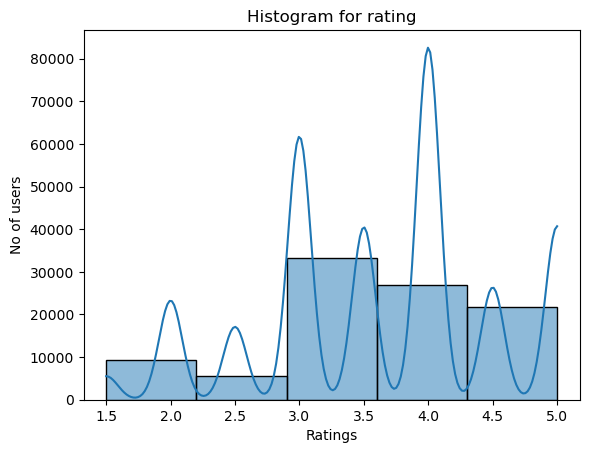

In [78]:
# Choose the column for which you want to create a histogram
column_name = 'rating'

# Extract the data from the selected column
column_data = merged_df[column_name]

# Create a histogram
sns.histplot(column_data, bins=5, kde=True)  # kde=True adds the distribution curve

# Add labels and a title
plt.xlabel('Ratings')
plt.ylabel('No of users')
plt.title('Histogram for {}'.format(column_name))

# Show the histogram

plt.show()

For a variety of reasons, including frequently reflecting the audience's varied interests and experiences, ratings may display a multimodal distribution. The following are some important elements that go towards the multimodality of movie ratings:
Audience Diversity Statistics, genre assessment, cultural disparities, and subjectivity



### b) Analysis on the UserId column

In [114]:
#Counting the number of unique user IDs
number_of_unique_users = merged_df['userId'].nunique()
number_of_unique_users

610

The userid column has 610 different users

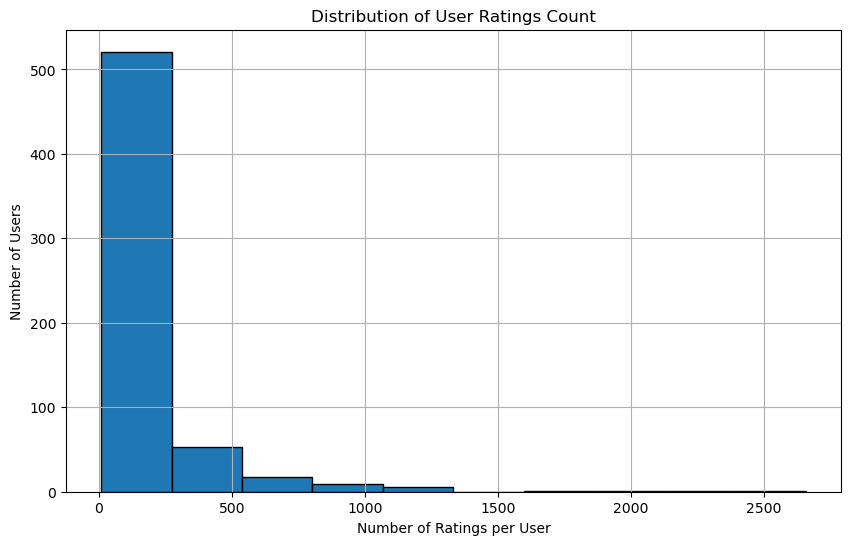

In [118]:
#GroupIing the data by 'userid' and count the number of ratings for each user
user_ratings_count = merged_df['userId'].value_counts()

# Set the number of bins for the histogram (you can adjust this)
num_bins = 10

# Create a histogram of user ratings distribution
plt.figure(figsize=(10, 6))
plt.hist(user_ratings_count, bins=num_bins, edgecolor='k')
plt.title('Distribution of User Ratings Count')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()


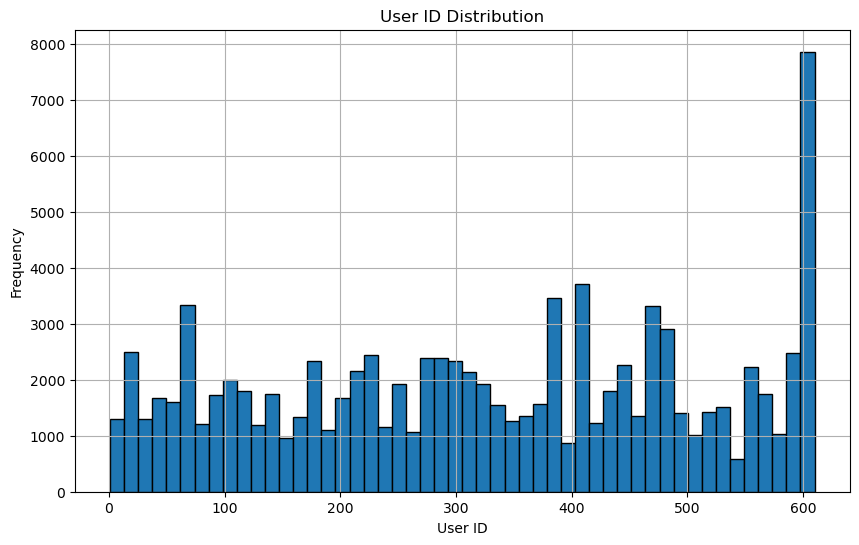

In [113]:
# Plot a histogram of user ID frequencies
plt.figure(figsize=(10, 6))
plt.hist(merged_df['userId'], bins=50, edgecolor='k')
plt.title('User ID Distribution')
plt.xlabel('User ID')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



# 7.Modelling

### a) Collaborative Filtering Model(User_item matrix)
It represents the interactions or preferences of users for items in a matrix format, where rows correspond to users, columns correspond to items, and the entries in the matrix represent user-item interactions or ratings

In [79]:
# Create a user-item interaction matrix
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')

# Fill missing values with 0 (indicating no interaction)
user_item_matrix = user_item_matrix.fillna(0)

# Calculate item-item similarity using cosine similarity
item_similarity = cosine_similarity(user_item_matrix.T)

# Convert item similarity into a DataFrame for easier indexing
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

In [85]:
#Generating recommedations
def get_movie_recommendations(movie_id, num_recommendations=5):
    similar_movies = item_similarity_df[movie_id].sort_values(ascending=False)
    recommended_movies = similar_movies.drop(movie_id).index[:num_recommendations]
    return recommended_movies

In [86]:
#Recommending 
movie_id_to_recommend = 101  # Replace with the movie ID you want recommendations for
recommendations = get_movie_recommendations(movie_id_to_recommend)
print(f"Recommendations for movie {movie_id_to_recommend}:")
print(recommendations)

Recommendations for movie 101:
Int64Index([2395, 1235, 556, 1449, 2110], dtype='int64', name='movieId')


In [91]:
# Sample movie recommendations function with titles
def get_movie_recommendations_with_titles(movie_id, num_recommendations=5):
    similar_movies = item_similarity_df[movie_id].sort_values(ascending=False)
    recommended_movies = similar_movies.drop(movie_id).index[:num_recommendations]
    
    # Retrieve movie titles for recommended movie IDs
    recommended_movie_titles = merged_df[merged_df['movieId'].isin(recommended_movies)]['title']
    
    return recommended_movie_titles

movie_id_to_recommend = 101  # Replace with the movie ID you want recommendations for
recommendations = get_movie_recommendations_with_titles(movie_id_to_recommend)
print(f"Recommendations for movie {movie_id_to_recommend}:")
recommendations

Recommendations for movie 101:


userId
275    War Room, The (1993)
372    War Room, The (1993)
414    War Room, The (1993)
474    War Room, The (1993)
510    War Room, The (1993)
               ...         
562         Rushmore (1998)
594         Rushmore (1998)
597         Rushmore (1998)
599         Rushmore (1998)
603         Rushmore (1998)
Name: title, Length: 127, dtype: object

In [92]:
#Evaluating the collaaborative model using rmse evaluation metric
# Function to calculate RMSE
def calculate_rmse(predicted_ratings, actual_ratings):
    predicted_ratings = predicted_ratings[actual_ratings.nonzero()].flatten()
    actual_ratings = actual_ratings[actual_ratings.nonzero()].flatten()
    mse = mean_squared_error(actual_ratings, predicted_ratings)
    rmse = math.sqrt(mse)
    return rmse

# Function to predict ratings for the test set
def predict_ratings(user_item_matrix, item_similarity):
    predicted_ratings = np.dot(user_item_matrix, item_similarity) / np.abs(item_similarity).sum(axis=0)
    return predicted_ratings

# Predict ratings for the test set
predicted_ratings = predict_ratings(user_item_matrix, item_similarity)

# Calculate RMSE for the test set
rmse = calculate_rmse(predicted_ratings, user_item_matrix.values)
print(f"RMSE: {rmse}")

RMSE: 3.14567115999214


An RMSE of 3 indicates that, generally, the predicted movie ratings of the model differ from the actual movie ratings by about 3 units on the rating scale. For instance, an RMSE of 3 indicates that, on average, the model's predictions may be off by about 3 stars if the rating scale is from 1 to 5.Thus this model is not a good one



### b) Using Singular Value Decomposition (SVD)
 SVD decomposes a matrix into three other matrices, which together capture the essential information and relationships within the original matrix.

In [100]:
#Saving the merged dataframe into a csv file for easy access
merged_df.to_csv('Merged.csv', index=False)
merged_df.columns

Index(['userId', 'movieId', 'title', 'rating'], dtype='object')

In [101]:
# Load the merged DataFrame
df = pd.read_csv('Merged.csv')  

# Create a Surprise Reader and Dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)


In [107]:
# Initialization of  the SVD algorithm
Ghost = SVD()

# Train the model on the training set
Ghost.fit(trainset)


In [108]:
# Making predictions on the testing set
predictions = Ghost.test(testset)

# Evaluating the model's performance using RMSE
rmse = accuracy.rmse(predictions)

print(f'RMSE: {rmse:.4f}')


RMSE: 0.7508
RMSE: 0.7508


The bulk of movie rating forecasts appear to be rather accurate, according to the RMSE value of 0.75. The majority of anticipated ratings fall within 0.75 units of the actual ratings.A low RMSE suggests that the recommendation engine is probably offering movie suggestions that are in line with consumers' interests, which increases user satisfaction. The likelihood that users will appreciate the movies that are suggested increases, which may increase user satisfaction and engagement.This means we have created a better model for recommedation.


In [109]:
user_id = '45' # Replace with the movie ID you want recommendations for

# Creating a list to store movie recommendations for the user
user_recommendations = []

# A list of all movie IDs in the dataset
all_movie_ids = merged_df['movieId'].unique()

# Iterating through all movie IDs and predict ratings for the user
for movie_id in all_movie_ids:
    prediction = algo.predict(user_id, movie_id)
    movie_title = merged_df[merged_df['movieId'] == movie_id]['title'].values[0]
    predicted_rating = prediction.est
    user_recommendations.append((movie_title, predicted_rating))

# Sorting the recommended movies by predicted rating in descending order
user_recommendations.sort(key=lambda x: x[1], reverse=True)

# Displaying the top N recommended movies
top_n = 10
top_movies = user_recommendations[:top_n]
for i, (movie_title, predicted_rating) in enumerate(top_movies, start=1):
    print(f'{i}. Movie: {movie_title}, Predicted Rating: {predicted_rating:.2f}')


1. Movie: Lawrence of Arabia (1962), Predicted Rating: 4.44
2. Movie: Shawshank Redemption, The (1994), Predicted Rating: 4.42
3. Movie: Streetcar Named Desire, A (1951), Predicted Rating: 4.37
4. Movie: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964), Predicted Rating: 4.33
5. Movie: Philadelphia Story, The (1940), Predicted Rating: 4.33
6. Movie: Rear Window (1954), Predicted Rating: 4.33
7. Movie: Fight Club (1999), Predicted Rating: 4.32
8. Movie: Great Escape, The (1963), Predicted Rating: 4.31
9. Movie: Departed, The (2006), Predicted Rating: 4.31
10. Movie: 12 Angry Men (1957), Predicted Rating: 4.31


## 8.Conclusion

In summary, customers' experiences watching movies could be greatly improved by the creation and application of a movie recommendation model. Such a model may precisely forecast and suggest movies that match users' preferences and interests by utilizing cutting-edge machine learning algorithms and data analysis approaches.Users can find new films through this methodology that they might not have otherwise seen, making for a more interesting and entertaining cinematic trip. 



## 9. Recommedations

- By enabling users to share their recommendations and ratings with others, the approach can also promote a sense of community and involvement, making movie watching more engaging and sociable.<br>
- Recommedation models should try to avoid The "filter bubble" effect, in which viewers are only exposed to content that confirms their previous inclinations, could offer difficulties for it by potentially limiting their exposure to a range of cinematic experiences. <br>
- Collecting and use of personal data can create ethical and privacy problems, user privacy and data security should be the top priorities when implementing such a model.
- The development and implementation of movie recommendation models must be done responsibly, with careful consideration of user privacy and a commitment to promote a variety of cinematic experiences. Movie recommendation models have the potential to revolutionize how we discover and enjoy movies.







